<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Modelo de LCD y polarímetro </font>
</div>

- **Para**: polarimeter, py_pol

- **Fecha**: 2021/11/09
        
- **Autores**:
    - Luis Miguel Sánchez Brea
    - Jesús del Hoyo Muñoz
    - Ángela Soria



- **Objetivos**:
    - Incluir modelo de LCD (teórico y experimental)
    - Desarrollo de polarímetro con LCD incluido para sacar amplitudes y fases
    - Optimización de ángulos.



- **Descripción**: Desde hace tiempo desarrollé el modelo de Burman. Es útil para las clases de Óptica digital, tanto la parte del LCD como la del polarizador. Yo metería todo en py_pol, como un add_on, ya que estará bastante bien desarrollado.

    Por otro lado, esto nos va a servir para hacer las optimizaciones. En el TFC de Burman había algunas funciones objetivo, pero ahora como tenemos PSO a casi pleno rendimiento y son muy pocos parámetros, creo que podrá con ello.


- **Pasos**:
    - All: ver la estrategia
    - LM: Meter todo esto en LCD.py y hacer ejemplos y tests
    - JdH: Optimizar código para que vaya bien, algunas cosas las he dejado muy bucle for.
    - JdH: Incluir modelo experimental de Holoeye
    - JdH: Meter todo en py_pol (o py_lab?) (LCD y polarimeter) En py_pol es público
    - JdH: Poner ejercicios para alumnos, igual para el año que viene, pero si te viene bien,está justo a pelo
    - ASG: Optimización de ángulos para amplitud y fase, sobre todo para el Holoeye, pero se puede probar con el kopin, pues tenemos los resultados del TFC de Burman.


- **Referencias**: 
    - Burman, A., M. T. Garea, A. Lutenberg, and F. Perez Quintián. 2011. “Characterization and Control of a Microdisplay as a Spatial Light Modulator.” Journal of Physics: Conference Series 274 (1). https://doi.org/10.1088/1742-6596/274/1/012102.
    - Burman, Ariel. 2010. “Caracterizacion y Control de Un Microdisplay Como Modulador Espacial de Luz.”


## Incluir parámetros

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:

import matplotlib.pyplot as plt
from numpy import cos, sin
from py_pol import degrees, np
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from scipy import interpolate


In [16]:
from models import Burman, Sony

In [17]:
from SLM import LCD_model

<div class="alert alert-block alert-info">

<b>Tarea:</b>
    
    - Meter modelo experimental de holoeye
    

</div>

In [18]:
circular_right=Jones_vector('right')
circular_right.circular_light('r')

circular_left=Jones_vector('left')
circular_left.circular_light('l')


P_unity = Jones_matrix('1')
P_unity.from_components((1, 0, 0, 1))


1 = 
[+1.000+0.000j +0.000+0.000j ]   
[+0.000+0.000j +1.000+0.000j ]   

## Ángulos de optimización

In [19]:
angles=np.array([0*degrees, 45*degrees, 45*degrees, 90*degrees])

best_amplitude_angles_kopin = np.array([0.78534751, 2.0500935, 1.85919493, 1.65223645])
best_phase_angles_kopin =  np.array([0.90843298, 1.16997935, 1.90292922, 0.49256759])
best_phase_angles_sony =  np.array([0.68212244, 0.76846075, 3.55419089, 0.96735988])
best_amplitude_angles_sony =  np.array([0.76769162, -0.39574837, -0.08821523, 0.32049111])

burman_fase_1 = np.array([72*degrees, np.nan, np.nan, 24*degrees])  # Burman pag 69 - verificado
burman_fase_2 = np.array([35*degrees, np.nan, np.nan, 60*degrees])  # Burman pag 70 - verificado 
burman_amplitud_1 = np.array([107*degrees, np.nan, np.nan, 79*degrees]) # Burman pag 71 - forma igual pero amplitud la mitad
burman_binario = np.array([35*degrees, np.nan, np.nan, 151*degrees]) # Burman pag 72 - verificado

no_polarizers = np.array([np.nan, np.nan, np.nan, np.nan])

angles=best_amplitude_angles_kopin
print(angles/degrees)

[ 44.99709777 117.46170516 106.52402278  94.66617534]


## Desarrollo del modelo

In [20]:
LCD = LCD_model()

In [21]:
LCD.load_theoretical_model(Burman)

In [23]:
LCD.get_matrices()

ValueError: shape too large to be a matrix.

In [108]:
# prueba
matrices=LCD.DC()
print(matrices.shape)

(2, 2, 64)


In [111]:
# prueba
matrices_pypol=LCD.DC_to_pypol()
print(matrices_pypol.shape)

[64]


In [110]:
P0, P1, P2, Q1, Q2, J = create_Jones_matrices(N=6)

# Inicializar los objetos pypol
P0.diattenuator_linear(azimuth=0)
P1.diattenuator_perfect(azimuth=0)
P2.diattenuator_perfect(azimuth=0)
Q1.quarter_waveplate(azimuth=0)
Q2.quarter_waveplate(azimuth=0)

J = 
[+1.000+0.000j +0.000+0.000j ]   
[+0.000+0.000j +0.000-1.000j ]   

In [93]:
source = Jones_vector('right')
source.circular_light(amplitude=np.sqrt(2), kind='r')
#source.linear_light(azimuth=45*degrees)

right = 
[+1.000+0.000j ]   
[+0.000+1.000j ]   

In [112]:
# implementar en función y en clase

pol1, pol2, pol3, pol4 = P1, Q1, Q2, P2


#if pol1 is not None:
if np.isnan(angles[0]):
    pol1_r = P_unity 
else: 
    pol1_r = pol1.rotate(angle=angles[0], keep=True)

    

#if pol2 is not None:
if np.isnan(angles[1]):
    pol2_r = P_unity 
else: 
    pol2_r = pol2.rotate(angle=angles[1], keep=True)


#if pol3 is not None:
if np.isnan(angles[2]):
    pol3_r = P_unity 
else: 
    pol3_r = pol3.rotate(angle=angles[2], keep=True)


#if pol4 is not None:
if np.isnan(angles[3]):
    pol4_r = P_unity 
else: 
    pol4_r = pol4.rotate(angle=angles[3], keep=True)


matrices_pypol = LCD.DC_to_pypol()

fields_gl = []
num_data = matrices_pypol.shape
fases_array = np.zeros(num_data,dtype=float)
amplitudes_array = np.zeros(num_data,dtype=float)
intensities_array = np.zeros(num_data,dtype=float)

# esto necesita una mejora
for i, matriz_i in enumerate(matrices_pypol):
    salida = pol4_r * pol3_r * \
        matrices_pypol[i] * pol2_r * pol1_r * source
    fields_gl.append(salida)

    phases = salida.parameters.global_phase(draw=False, verbose=False)
    #phases = phases - phases.min()
    #phases = np.unwrap(phases - phases[0])
    #phases = phases - phases.min()
    intensities = salida.parameters.intensity(draw=False, verbose=False)
    amplitudes = np.sqrt(intensities)
    
    fases_array[i]=phases
    amplitudes_array[i]=amplitudes
    intensities_array[i]=intensities

fases_array = fases_array - fases_array.min()
fases_array = np.unwrap(fases_array - fases_array[0])
fases_array = fases_array - fases_array.min()

In [127]:
salida

J @ 94.67 deg * J @ 106.52 deg * SLM_picked * J @ 117.46 deg * J @ 45.00 deg * right = 
[-0.018+0.003j ]   
[+0.225-0.039j ]   

## Resultados

Las funciones para comparar con burman son con amplitud

(0.0, 252.0)

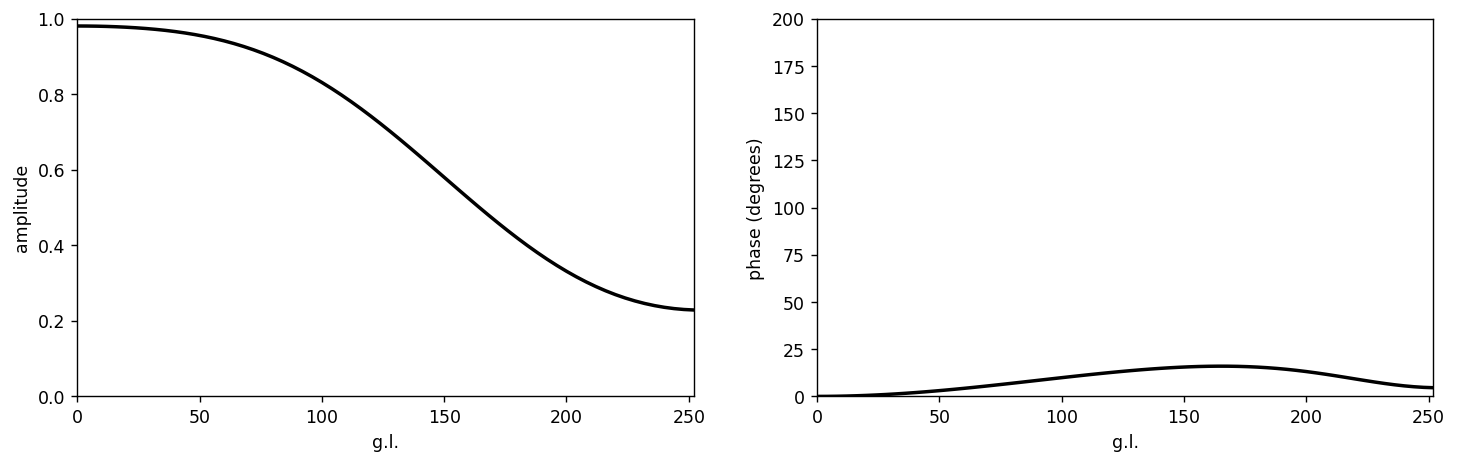

In [119]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(LCD.gl, amplitudes_array, 'k', lw=2)
plt.xlabel('g.l.')
plt.ylabel('amplitude')
plt.ylim(0,1)
plt.xlim(LCD.gl[0], LCD.gl[-1])

plt.subplot(1,2,2)
plt.plot(LCD.gl, fases_array/degrees, 'k', lw=2)
plt.xlabel('g.l.')
plt.ylabel('phase (degrees)')
plt.ylim(0,200)
plt.xlim(LCD.gl[0], LCD.gl[-1])



## Para empezar las optimizaciones


**Nota**: Esto es lo que se podría optimizar para amplitud o fase:

**Por ejemplo** 

En intensidad
- Maximizar rango intensidad y minimizar std de fase

En fase:
- Maximizar rango de fase y minimizar std de intensiad

In [128]:
def intensity_range(intensities):
    return intensities.max()-intensities.min()

def intensity_std(intensities):
    return np.std(intensities)


def phase_range(phases):
    return phases.max()-phases.min()

def phase_std(phases):
    return np.std(phases)

In [124]:
IR=intensity_range(intensities_array)
Istd=intensity_std(intensities_array)
FR=phase_range(fases_array)/degrees
Fstd=phase_std(fases_array)/degrees

In [125]:
print("I: range = {:2.2f}, std ={:2.2f}\nF: range = {:2.2f}, std ={:2.2f}".format(IR,Istd,FR,Fstd))

I: range = 0.91, std =0.35
F: range = 16.01, std =5.36
